<a href="https://colab.research.google.com/github/hollyxue05/AMS-332-Physiological-Systems-Modeling/blob/main/Simulating_an_autoregulatory_gene_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of an Autoregulatory Gene

In this notebook we implement of first model of gene regulation, using an  autoregulatory gene following the Hill equation as an example.

You should implement your own Python code in the appropriate block and ensure you are able to answer all relevant questions.

Please note that some questions may require you to work "by hand", so have a notepad or notebook handy.

Again, we will need two important Python libraries:  `numpy` and `matplotlib`. These are initialized in the following code-snippet:




In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# An Auto-Enhancer

An autoregulatory gene is one that encodes a protein whose function (or part of whose function) is to regulate its own transcription.  For *activating* regulation modelled with the Hill equation, a system of differential equations is:  
$$
\frac{d[X_{r}]}{dt} =  \frac{\mu [X_{p}]^h}{K_{1/2}^h+[X_{p}]^h} - \chi_{r} [X_{r}]\hspace{0.75in}
 \frac{d[X_{p}]}{dt} =  \omega [X_{r}] - \chi_{p} [X_{p}]
$$
where $[X]_p$ and $[X]_r$ represent the concentration of the protein and  mRNA of the gene, respectively.

In earlier exercises, you visually explored how the parameters of the Hill equation impacts its shape by creating plots of the equation with varying parameters, and numerically integrate the Hill equation to derive a trajectory through time.

Here we will integrate a *system* of differential equations to understand the behaviour of this system.

## Numerical integration of a system of ODEs
The system of two differential equations m can be numerically integrated to give both $[X]_p$ and $[X]_r$  as functions of time, given initial values of both species ($[X]_{p,0}$ and $[X]_{r,0}$ at $t=0$.

The Forward Euler algorithm again can be used here, simply by applying the update rule for both species at each time step:
$$[X]_p(t+\Delta t) = [X]_p(t) +  \left ( \frac{d[X]_p(t)}{dt} \right )\Delta t$$
$$[X]_r(t+\Delta t) = [X]_r(t) +  \left ( \frac{d[X]_r(t)}{dt} \right )\Delta t$$

Implement this approach to determine the concentration of both RNA and protein over time; use a time step of $\Delta t = 0.01~s$ and model parameters of:  $h=2$, $K_{1/2} = 0.33$ mM and $\mu=1$ mM$\cdot s^{-1}$, $\omega=1$ $s^{-1}$, and  $\chi_{p}=\chi_{r}=1$ $s^{-1}$.

Simulate the system for a minimum of 20 $s$ total time and plot the concentrations of both protein and RNA as a function of time using each of the following initial conditions:
* An initial concentration of 0.4 mM for protein and of 0 mM for RNA.
* An initial concentration of 0 mM for protein and of 0.4 mM for RNA.
* An initial concentration of 0.2 mM for protein and of 0 mM for RNA.
* An initial concentration of 0 mM for protein and of 0.2 mM for RNA.



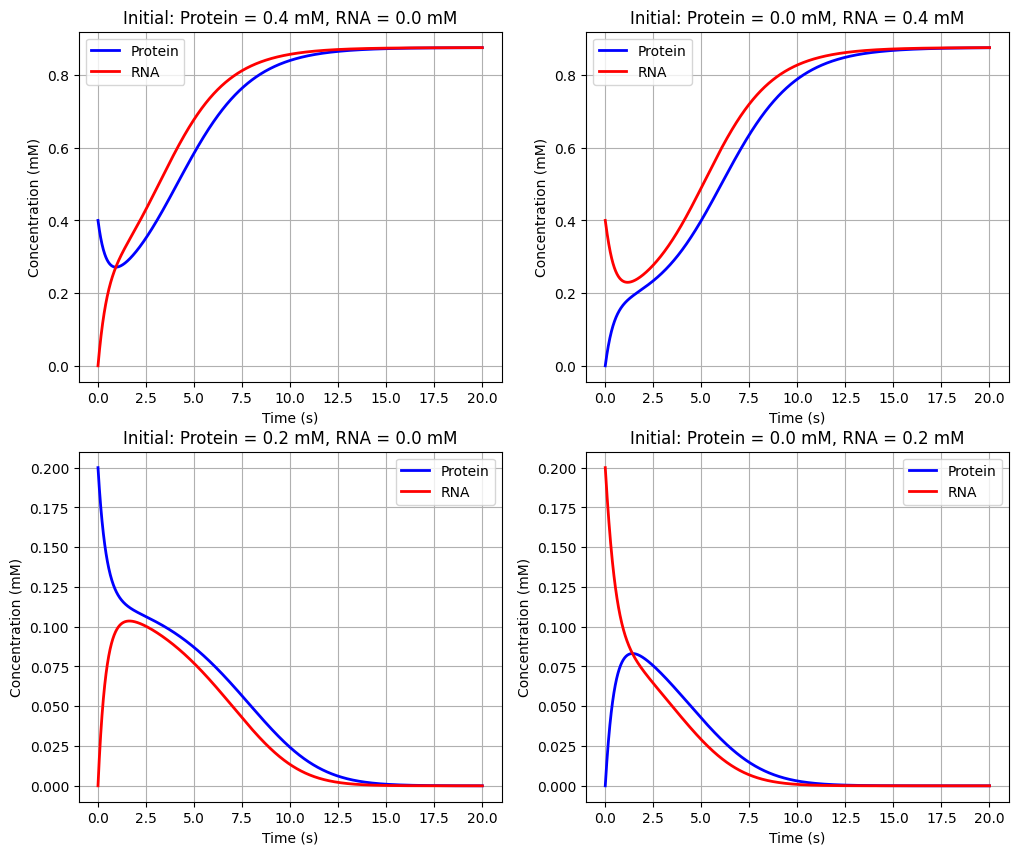

In [6]:
# Enter code for simulation

import numpy as np
import matplotlib.pyplot as plt

# overal model parameters
h = 2
K_half = 0.33
mu = 1.0
omega = 1.0
chi_p = 1.0
chi_r = 1.0

# overall simulation parameters
dt = 0.01
t_max = 20.0
t = np.arange(0, t_max + dt, dt)
n_steps = len(t)

# four sets of diff initial conditions
# (Protein, RNA)
initial_conditions = [(0.4, 0.0), (0.0, 0.4), (0.2, 0.0), (0.0, 0.2)]

def get_derivatives(Xp, Xr):
    # Hill plot
    transcription_rate = mu * (Xp**h) / (K_half**h + Xp**h)

    dXr_dt = transcription_rate - chi_r * Xr
    dXp_dt = omega * Xr - chi_p * Xp

    return dXp_dt, dXr_dt

# 2x2 grid for the four different starting conditions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (Xp0, Xr0) in enumerate(initial_conditions):
    # arrays to store concentration values over time
    Xp = np.zeros(n_steps)
    Xr = np.zeros(n_steps)

    # initial conditions
    Xp[0] = Xp0
    Xr[0] = Xr0

    # Forward Euler numerical integration
    for step in range(n_steps - 1):
        dXp, dXr = get_derivatives(Xp[step], Xr[step])

        Xp[step + 1] = Xp[step] + dXp * dt
        Xr[step + 1] = Xr[step] + dXr * dt

    # plotting the results for the current set of initial conditions
    axes[i].plot(t, Xp, label='Protein', color='blue', linewidth=2)
    axes[i].plot(t, Xr, label='RNA', color='red', linewidth=2)

    axes[i].set_title(f'Initial: Protein = {Xp0} mM, RNA = {Xr0} mM')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Concentration (mM)')
    axes[i].legend()
    axes[i].grid(True)

plt.show()

## Interpreting your simulation.

Discuss your observations, including consideration of any steady-states or equilibria observed as well as the dynamic trajectories.

At a minimum, you should answer the following questions:
* Does each simulation reach a steady state?
* How many different steady states are reached?
* How long does it take for each simulation to reach steady state?
* What would you expect to happen if you began with very small amounts of both RNA and protein (say 0.01 mM of each)?
* What would you expect to happen is you began with 0.4 mM of *both* RNA and protein?






## Enter interpretation here

1.   All four simulations reach a steady state where the slopes of the RNA and protein concentrations stop changing.
2.   In the four simulations, there are only two steady states present: 0.0 Mm and around 8.6 Mm.
3.   The amount of time it takes each simulation to reach its steady state varies with the concentration of initial protein or RNA. Generally, the greater the starting concentration, the longer the simulation runs before reaching a steady state.
4.   If the starting concentrations of both RNA and protein are very small, I expect the simulation to reach the zero steady state rapidly. This is due to the system having an insufficient amount of RNA and protein to sustain the transcription to reach the nonzero steady state.
5.   If the starting concentrations of both RNA and protein were relatively high at 0.4, I expect the simulation to reach the nonzero steady state rapidly. This is due to the increasing concentrations of protein and RNA allowing for more transcriptions until the nonzero steady state is reached and the system reaches an equilibrium.




## Exploring the phase plane.

In the above code you considered a handful of individual starting conditions. Here we will expand our code to explore *many* different starting conditions in a systematic manner.

Embed your simulation code in an outer double loop so that the simulation may be repeated with many combinations of starting concentrations of both protein and RNA, with the results plotted on a **single plot** of $[X_{r}]$ vs $[X_{p}]$ (**not** a plot of concentrations versus time).   Vary the starting concentrations of both protein and mRNA from 0.0 to 1.4 mM in intervals of 0.2 mM and  consider *all combinations* of these.

### Nested ```for``` loops:  

To repeat a simulation over many initial conditions, as in Part B question 3, you can use multiple {\tt for} loops.   Create one loop for each condition that is being varied, and place all your simulation code inside this loop structure.

Your code may look somethink like this:
```
for rna0 in np.arange(0,1.4,0.2):
  for prot0 in np.arange(0,1.4,0.2):
   # Fill in this section with your simulation and plotting code.
```


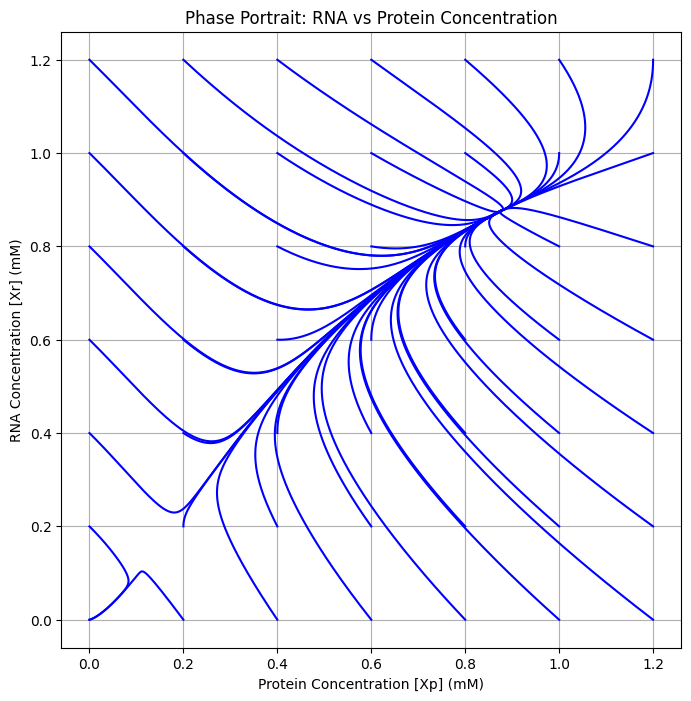

In [4]:
# Enter code for exploration of starting conditions.

import numpy as np
import matplotlib.pyplot as plt

# overal model parameters
h = 2
K_half = 0.33
mu = 1.0
omega = 1.0
chi_p = 1.0
chi_r = 1.0

# overall simulation parameters
dt = 0.01
t_max = 20.0
t = np.arange(0, t_max + dt, dt)
n_steps = len(t)

def get_derivatives(Xp, Xr):
    # Hill plot
    transcription_rate = mu * (Xp**h) / (K_half**h + Xp**h)

    dXr_dt = transcription_rate - chi_r * Xr
    dXp_dt = omega * Xr - chi_p * Xp

    return dXp_dt, dXr_dt

plt.figure(figsize=(8, 8))

for rna0 in np.arange(0,1.4,0.2):
  for prot0 in np.arange(0,1.4,0.2):

        Xp = np.zeros(n_steps)
        Xr = np.zeros(n_steps)

        # initial conditions
        Xp[0] = prot0
        Xr[0] = rna0

        # Forward Euler numerical integration
        for step in range(n_steps - 1):
            dXp, dXr = get_derivatives(Xp[step], Xr[step])

            Xp[step + 1] = Xp[step] + dXp * dt
            Xr[step + 1] = Xr[step] + dXr * dt

        plt.plot(Xp, Xr, color='blue')

plt.title('Phase Portrait: RNA vs Protein Concentration')
plt.xlabel('Protein Concentration [Xp] (mM)')
plt.ylabel('RNA Concentration [Xr] (mM)')
plt.grid(True)
plt.show()

## Interpreting your results

Explain what each line on this graph represents, with a particular focus on the significance of the beginning and the end of each line.  

Is there anything interesting you notice?

Find analytical expressions for the null clines and stationary points of this system in terms of the model parameters.   Using the given parameters,
plot the null clines on the $[X_{r}]$ vs $[X_{p}]$ phase plane and compute the concentrations of the stationary points.

Discuss your results in the context of both the mathematics of the model and
the biology of an autoregulatory gene.  Again you should assess how many stationary states you observe, but additionally describe what those states would represent in a biological context.  

Can you suggest a circumstance where a system with this behavior may be beneficial (biologically)?

Propose at least one question you have that your results leave unanswered.

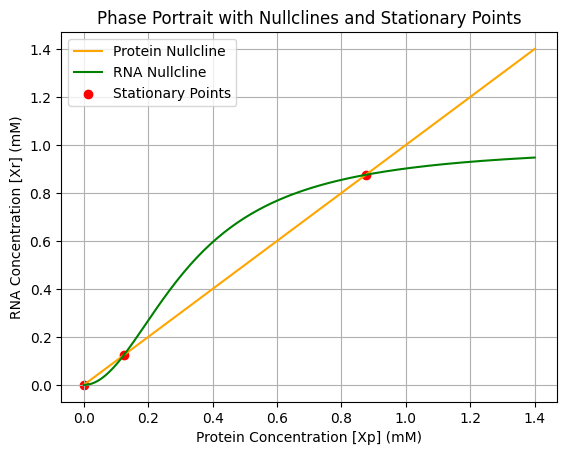

In [14]:
# Optional code to plot null clines and find stationary points, if not done by hand.

# Enter code for exploration of starting conditions.

import numpy as np
import matplotlib.pyplot as plt

# overal model parameters
h = 2
K_half = 0.33
mu = 1.0
omega = 1.0
chi_p = 1.0
chi_r = 1.0

# overall simulation parameters
dt = 0.01
t_max = 20.0
t = np.arange(0, t_max + dt, dt)
n_steps = len(t)

# array of protein concentrations to plot the analytical nullclines
xp_vals = np.linspace(0, 1.4, 200)

# protein nullcline calculation
xr_prot_null = (chi_p / omega) * xp_vals

# RNA nullcline calculation
xr_rna_null = (mu / chi_r) * (xp_vals**h) / (K_half**h + xp_vals**h)

plt.plot(xp_vals, xr_prot_null, color='orange', label='Protein Nullcline')
plt.plot(xp_vals, xr_rna_null, color='green', label='RNA Nullcline')

# marking the three stationary points where the nullclines intersect
stationary_points = [(0, 0), (0.124, 0.124), (0.876, 0.876)]
xp_stat = [p[0] for p in stationary_points]
xr_stat = [p[1] for p in stationary_points]

plt.scatter(xp_stat, xr_stat, color='red', label='Stationary Points')

# Format the plot
plt.title('Phase Portrait with Nullclines and Stationary Points')
plt.xlabel('Protein Concentration [Xp] (mM)')
plt.ylabel('RNA Concentration [Xr] (mM)')
plt.legend()
plt.grid(True)

## Enter discussion here

Each line on this graph represents the trajectory for each reaction based on the specific starting conditions. The beginning of each line represents the system of RNA and protein at time $t=0$. The end of each line represents when the system reaches a steady state. Something to note is that there are clearly two converging endpoints. All reactions that begin on the left side of the "diagonal threshold" will converge at the origin and the reactions that begin on the right side will eventually converage at the nonzero steady state.

After plotting the nullclines, I see three steady states: 0.0 Mm, 0.124 Mm, and 0.876 Mm. From looking at the phase portrait, 0.0 Mm and 0.876 Mm are stable steady states because they become the endpoints for the curves. 0.124 Mm must be an unstable steady state, or a saddle point. This gives the exact point of the "diagonal threshold". For example, if the concentration of protein rises above 0.124 Mm , the system should be able to progress and reach the nonzero steady state.

This simulation focuses on the value of a unstable, intermediate steady state in between two stable steady states. This behavior gives systems the ability to reach a high steady state after being prompted. As a result, biological systems can essentially have an on/off switch. Once a factor of the system has been pushed into a new state, the system will remain at that state. One example of a biological system that exploits this is mitosis. Mitosis is a very all or nothing event for cells. It is important for the cell to have a certain threshold where it is guaranteed to have a successful mitosis. Mitosis failing in the middle of a division can be harmful to the cell and its DNA.

How would changing the overall system parameters change the plots? For example, what if $h=2$, so instead of a typical Hill equation, we simulate Michaelis-Menten kinetics?

##